In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [7]:
fileData = open('CitibikeTripsWeather_10000000.csv','r')

dic = collections.defaultdict(int)
days = collections.defaultdict(list)


In [8]:
bucket = 3
data = fileData.readline()
data = data.split(',')
print data[10]
lines = fileData.readlines()
for val in lines:
    val = val.split(',')
    #print val
    if float(val[12]) > 0.0:
        #print val[10]
        dic[int(float(val[12])/bucket)] += 1      
        date = parse(val[1])
        string = str(date.month)+'/'+str(date.day)+'/'+str(date.year)
        if string not in days[int(float(val[12])/bucket)]:
            days[int(float(val[12])/bucket)].append(string)
            
#print days

prcp


In [9]:
prcp = sorted(dic)
print prcp

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [10]:
result = []
#print dic
#print days
for each_prcp in prcp:
    #print len(days[each_prcp])
    result.append(dic[each_prcp]/len(days[each_prcp]))
for i in range(len(prcp)):
    prcp[i] = str(prcp[i]*bucket) + '-' + str(((prcp[i]+1)*bucket)-1)
#print prcp
print result

[4331, 3080, 8692, 6921, 8542, 7855, 11174, 9981, 10986, 14643, 15873, 16760, 18224, 18496, 20782, 21419, 26898, 27756, 27540, 27203, 27024, 26238, 27565, 26734, 25206, 30286]


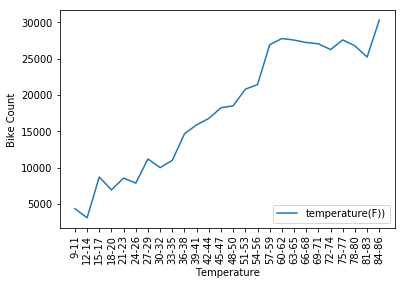

In [11]:
plt.plot(result, label = 'temperature(F))')
plt.xticks([i for i in range(len(prcp))], prcp, rotation='vertical')

plt.ylabel('Bike Count')
plt.xlabel('Temperature')
plt.legend(loc = 'lower right')
plt.show()
plt.savefig('Weather.png')

In [30]:
X = [i for i in range(len(prcp))]
from sklearn import linear_model
regrA = linear_model.LinearRegression(fit_intercept=True)
#print "regression started"
#regrA.fit(np.array(X).transpose,np.array(result).transpose)
#print "regression coefficients: ", str(regrA.coef_)
P =  np.array(X)
P = P.reshape(len(P),1)
resultX =  np.array(result)
resultX = resultX.reshape(len(resultX),1)
regrA.fit(P,resultX)
#print resultX

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
Q = regrA.predict(P)

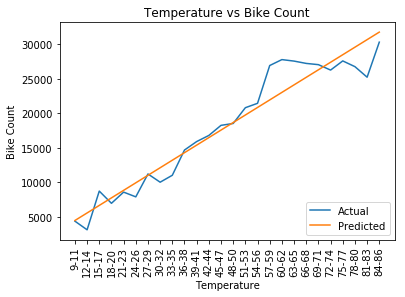

In [48]:
plt.plot(result, label = 'Actual')
plt.xticks([i for i in range(len(prcp))], prcp, rotation='vertical')
plt.plot(Q, label = "Predicted")
plt.ylabel('Bike Count')
plt.xlabel('Temperature')
plt.legend(loc = 'lower right')
plt.title('Temperature vs Bike Count')
plt.show()

In [49]:
def SSE(Y_actual, Y_predicted):
    return sum((Y_predicted - Y_actual)**2)/len(Y_predicted)
def MAPE(Y_actual, Y_predicted):
    return (100.0/len(Y_actual))* sum(abs((Y_predicted-Y_actual)/(Y_actual)))

In [51]:
#SSE(result, Q.transpose())

In [53]:
st = []
for i in Q:
    st.append(i[0])
respp = np.array(result)
respp = respp.reshape(len(respp),1)
print MAPE(respp, Q)

[ 11.97344107]
